# Mechanical Tools recognizer

## CONTENTS :

## 1 ) Importing Various Modules

## 2 ) Preparing the Data

## 3 ) Modelling

## 4 ) Evaluating the Model Performance

## 5 ) Visualizing Predictons on the Validation Set

In [1]:
# Mechanical tools classifiaction
import os
print(os.listdir("F:\\tools\\training"))

['Gasoline Can', 'Hammer', 'pebbel', 'Pliers', 'Rope', 'Screw Driver', 'Tool box', 'Wrench']


# 1 ) Importing Various Modules.

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess.
from keras.preprocessing.image import ImageDataGenerator

# dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# 2 ) Preparing the Data

## 2.1) Making the functions to get the training and validation set from the  Images

In [3]:
X=[]
Z=[]
IMG_SIZE=150
tools_Gasoline_Can_DIR='F:\\tools\\training\\Gasoline Can'
tools_Hammer_DIR='F:\\tools\\training\\Hammer'
tools_pebbel_DIR='F:\\tools\\training\\pebbel'
tools_Pliers_DIR='F:\\tools\\training\\Pliers'
tools_Rope_DIR='F:\\tools\\training\\Rope'
tools_Screw_Driver_DIR='F:\\tools\\training\\Screw Driver'
tools_Tool_box_DIR='F:\\tools\\training\\Tool box'
tools_Wrench_DIR='F:\\tools\\training\\Wrench'

In [4]:
def assign_label(img,tool_type):
    return tool_type

In [5]:
def make_train_data(tool_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tool_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Gasoline Can',tools_Gasoline_Can_DIR)
print(len(X))

make_train_data('Hammer',tools_Hammer_DIR)
print(len(X))

make_train_data('pebbel',tools_pebbel_DIR)
print(len(X))

make_train_data('Pliers',tools_Pliers_DIR)
print(len(X))

make_train_data('Rope',tools_Rope_DIR)
print(len(X))

make_train_data('Screw Driver',tools_Screw_Driver_DIR)
print(len(X))

make_train_data('Tool box',tools_Tool_box_DIR)
print(len(X))

make_train_data('Wrench',tools_Wrench_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:03<00:00, 79.38it/s]


243


100%|██████████████████████████████████████████████████████████████████████████████| 1603/1603 [00:17<00:00, 91.22it/s]


1846


100%|███████████████████████████████████████████████████████████████████████████████| 607/607 [00:05<00:00, 103.98it/s]


2453


100%|███████████████████████████████████████████████████████████████████████████████| 398/398 [00:03<00:00, 113.47it/s]


2851


100%|████████████████████████████████████████████████████████████████████████████████| 409/409 [00:08<00:00, 48.29it/s]


3260


100%|█████████████████████████████████████████████████████████████████████████████| 1169/1169 [00:09<00:00, 121.03it/s]


4429


100%|███████████████████████████████████████████████████████████████████████████████| 391/391 [00:03<00:00, 123.23it/s]


4820


100%|██████████████████████████████████████████████████████████████████████████████| 1217/1217 [00:12<00:00, 99.40it/s]

6037


## 2.2 ) Visualizing some Random Images

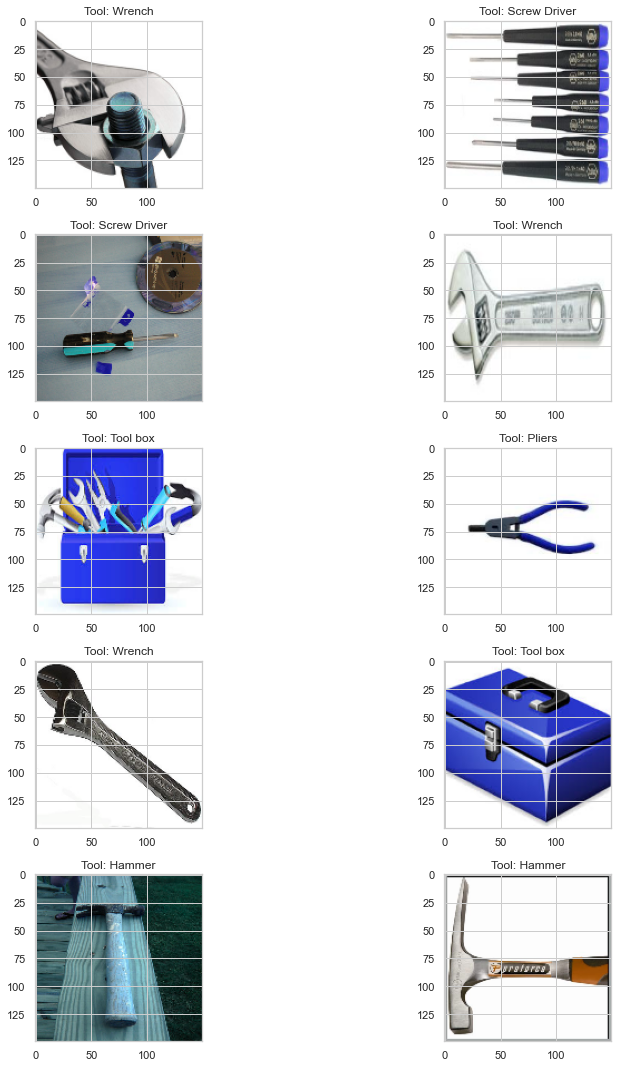

In [7]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tool: '+Z[l])
        
plt.tight_layout()

## 2.3 ) Label Encoding the Y array (i.e. Hammer->0, Screw driver->1 etc...) & then One Hot Encoding

In [8]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,8)
X=np.array(X)
X=X/255

In [9]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## 2.5 ) Setting the Random Seeds

In [10]:
np.random.seed(42)
rn.seed(42)
# tf.set_random_seed(42)
tf.random.set_seed(42)

# 3 ) Modelling
## 3.1 ) Building the ConvNet Model

In [11]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(8, activation = "softmax"))

## 3.2 ) Using a LR Annealer

In [12]:
batch_size=64
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

In [14]:

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [16]:

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
70/70 [==============================] - 130s 2s/step - loss: 1.8488 - accuracy: 0.2776 - val_loss: 1.7168 - val_accuracy: 0.3126
Epoch 2/50
70/70 [==============================] - 125s 2s/step - loss: 1.7211 - accuracy: 0.3148 - val_loss: 1.6562 - val_accuracy: 0.3742
Epoch 3/50
70/70 [==============================] - 103s 1s/step - loss: 1.6690 - accuracy: 0.3388 - val_loss: 1.6192 - val_accuracy: 0.3437
Epoch 4/50
70/70 [==============================] - 106s 2s/step - loss: 1.6129 - accuracy: 0.3699 - val_loss: 1.5845 - val_accuracy: 0.3821
Epoch 5/50
70/70 [==============================] - 117s 2s/step - loss: 1.5746 - accuracy: 0.3872 - val_loss: 1.4965 - val_accuracy: 0.4305
Epoch 6/50
70/70 [==============================] - 124s 2s/step - loss: 1.5480 - accuracy: 0.3952 - val_loss: 1.4500 - val_accuracy: 0.4371
Epoch 7/50
70/70 [==============================] - 129s 2s/step - loss: 1.5136 - accuracy: 0.4141 - val_loss: 1.4581 - val_accuracy: 0.4384
Epoch 8/50
70

In [17]:
model.save('tool_classifier')

INFO:tensorflow:Assets written to: tool_classifier\assets


In [18]:
model.save('tool_classifier.h5')

# 4 ) Evaluating the Model Performance

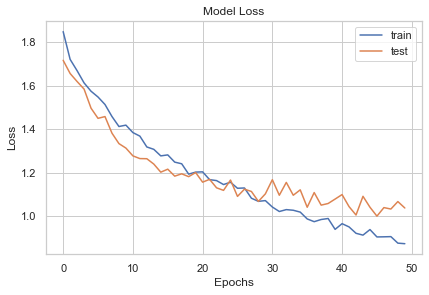

In [19]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

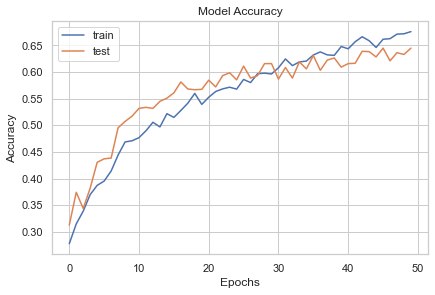

In [20]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# 5 ) Visualizing Predictons on the Validation Set

In [21]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [22]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

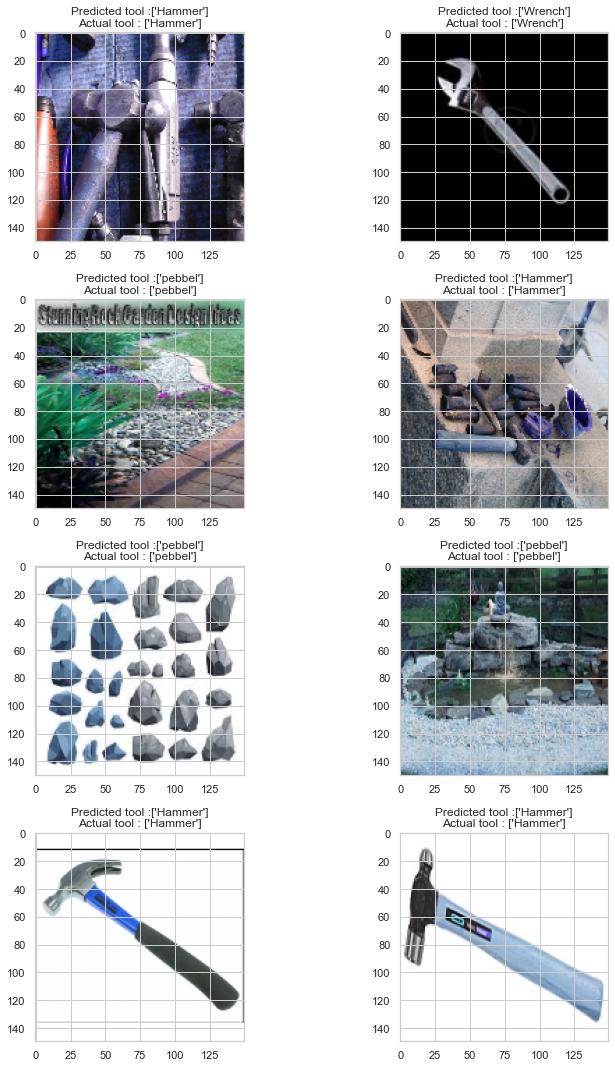

In [23]:
# CORRECTLY CLASSIFIED Tool IMAGES
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        #ax[i,j].set_title("Predicted tool : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual tool : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        ax[i,j].set_title("Predicted tool :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual tool : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

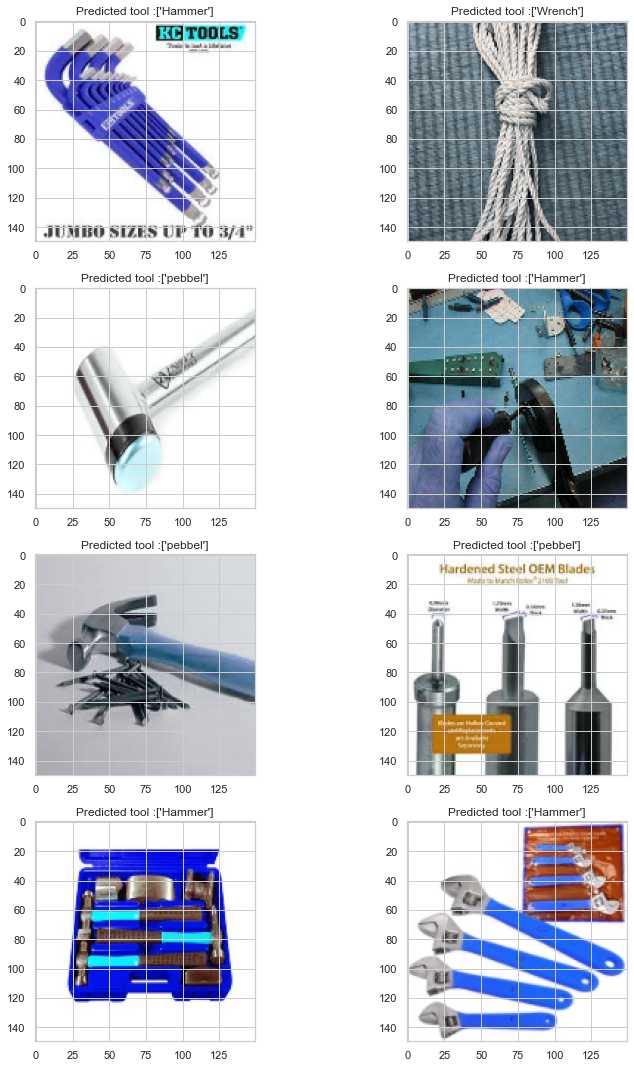

In [26]:
# MISCLASSIFIED IMAGES OF Tools
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        #ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        ax[i,j].set_title("Predicted tool :"+str(le.inverse_transform([pred_digits[prop_class[count]]])))#+"\n"+"Actual tool : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

In [25]:
model.save("latestmodel.h5")